In [3]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [4]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

# Carregar o modelo
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
sentences = ['homem', 'mulher', 'Campinas', 'São Paulo']
embeddings = model.encode(sentences)

In [6]:
from sklearn.decomposition import PCA

# Reduzir a dimensionalidade
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

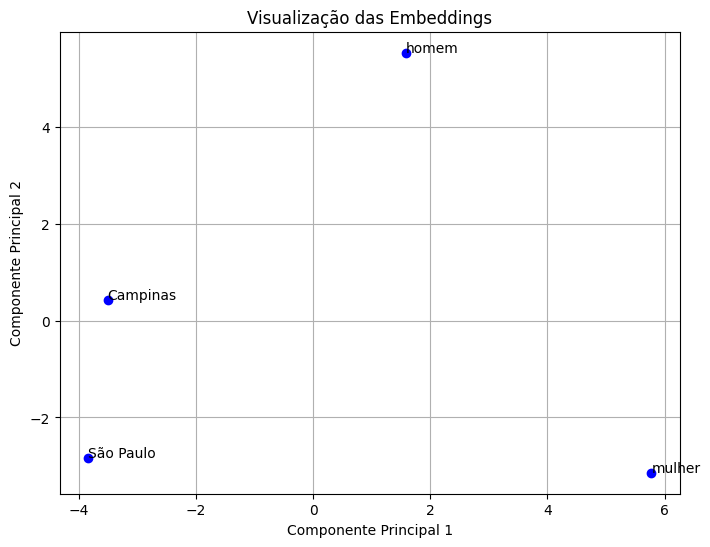

In [7]:
# Plotar as embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c='blue')
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização das Embeddings')
plt.grid(True)
plt.show()

In [8]:
import pandas as pd
import numpy as np

# matriz de distancia entra as palavras
distances = np.linalg.norm(embeddings[:, np.newaxis, :] - embeddings[np.newaxis, :, :], axis=-1)
df_euc = pd.DataFrame(distances, index=sentences, columns=sentences)
print(df_euc)

               homem     mulher   Campinas  São Paulo
homem       0.000000   9.985577   9.620670  10.160686
mulher      9.985577   0.000000  10.640411  10.630916
Campinas    9.620670  10.640411   0.000000   8.902700
São Paulo  10.160686  10.630916   8.902700   0.000000


<Axes: >

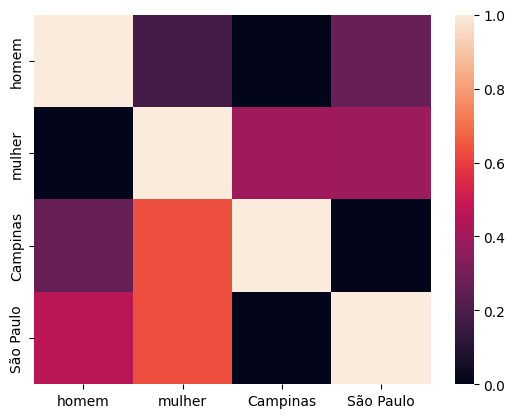

In [10]:
import seaborn as sns

#  normalização ds dados
max_value = np.max(distances) + 1
distances[distances == 0] = max_value

min_values = np.min(distances, axis=1, keepdims=True)
max_values = np.max(distances, axis=1, keepdims=True)

normalized_matrix = (distances - min_values) / (max_values - min_values)
df_euc_norm = pd.DataFrame(normalized_matrix, index=sentences, columns=sentences)

# plotar o heatmap
sns.heatmap(data=df_euc_norm)

In [11]:
df_euc_norm

,homem,mulher,Campinas,São Paulo
homem,1.000000,0.180670,0.00000,0.267369
mulher,0.000000,1.000000,0.39571,0.389972
Campinas,0.262252,0.634731,1.00000,0.000000
São Paulo,0.459503,0.631263,0.00000,1.000000
